In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import datetime as dt
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [5]:
df= pd.read_excel(r"C:\Users\User\Desktop\kodlasam\python\FMCG Satış Analizi Projesi\sfs.xlsx")


In [6]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

In [7]:
df.sample(10)

,Index,Date old,Year,Month,Age,Gender,Country,Region,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
32877,32878,2016-04-29,2016.0,April,44.0,M,USA,California,Accessories,Helmets,2.0,525.00,652.500000,1050.0,1305,255.0
31253,31254,2016-01-02,2016.0,January,40.0,F,USA,California,Accessories,Tires and Tubes,3.0,91.67,112.000000,275.0,336,61.0
11613,11614,2016-03-22,2016.0,March,30.0,M,Germany,Bayern,Bikes,Mountain Bikes,2.0,1147.50,1436.500000,2295.0,2873,578.0
21,22,2015-10-07,2015.0,October,29.0,F,USA,Washington,Accessories,Tires and Tubes,1.0,125.00,136.000000,125.0,136,11.0
15938,15939,2016-03-12,2016.0,March,49.0,F,Germany,Nordrhein-Westfalen,Accessories,Bottles and Cages,3.0,15.00,21.333333,45.0,64,19.0
18003,18004,2015-07-31,2015.0,July,37.0,F,USA,California,Accessories,Bottles and Cages,3.0,6.67,7.333333,20.0,22,2.0
20740,20741,2016-05-29,2016.0,May,37.0,M,Germany,Nordrhein-Westfalen,Clothing,Jerseys,2.0,700.00,904.500000,1400.0,1809,409.0
11609,11610,2015-10-24,2015.0,October,30.0,F,France,Seine (Paris),Accessories,Bottles and Cages,1.0,171.00,160.000000,171.0,160,-11.0
17414,17415,2016-01-20,2016.0,January,26.0,M,Germany,Saarland,Accessories,Tires and Tubes,3.0,172.00,265.333333,516.0,796,280.0
2423,2424,2016-05-23,2016.0,May,39.0,M,UK,England,Accessories,Helmets,1.0,1015.00,1311.000000,1015.0,1311,296.0


In [8]:
df.duplicated().value_counts()

False    34867
dtype: int64

# OVERVIEW

In [9]:
def description(x):
    print("GENERAL OVERVIEW\n")
    print(x.info())
    print("*****************************\n")
    print("NUMERICAL COLUMN INFORMATION\n")
    print(x.describe())
    print("***************\n")
    print("NUMBER OF ROWS:", x.shape[0])
    print("***************\n")
    print("NUMBER OF COLUMNS:", x.shape[1])
    print("***************\n")
    print("CORRELATION STATUS\n")
    print(x.corr())
    print("***************\n")
    print("COLUMN NAMES\n")
    print(x.columns)
    print("***************\n")
    print("NULL COLUMN INFORMATION")
    print(x.isnull().sum())

In [10]:
description(df)

GENERAL OVERVIEW

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Index             34867 non-null  int64         
 1   Date old          34866 non-null  datetime64[ns]
 2   Year              34866 non-null  float64       
 3   Month             34866 non-null  object        
 4   Age               34866 non-null  float64       
 5   Gender            34866 non-null  object        
 6   Country           34866 non-null  object        
 7   Region            34866 non-null  object        
 8   Product Category  34866 non-null  object        
 9   Sub Category      34866 non-null  object        
 10  Quantity          34866 non-null  float64       
 11  Unit Cost         34866 non-null  float64       
 12  Unit Price        34866 non-null  float64       
 13  Cost              34866 non-null  float64       
 14  Reve

In [11]:
df['Age segment'] = pd.cut(df['Age'], bins=[0, 25, 32, 40, 50, 90])

In [12]:
df.sample(10)

,Index,Date old,Year,Month,Age,Gender,Country,Region,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,Age segment
27974,27975,2015-12-26,2015.0,December,20.0,M,USA,California,Accessories,Tires and Tubes,1.0,68.00,79.000000,68.0,79,11.0,"(0, 25]"
26819,26820,2016-01-07,2016.0,January,46.0,F,USA,Oregon,Bikes,Mountain Bikes,3.0,773.33,738.000000,2320.0,2214,-106.0,"(40, 50]"
33707,33708,2016-05-08,2016.0,May,28.0,M,Germany,Hessen,Accessories,Tires and Tubes,2.0,391.50,544.500000,783.0,1089,306.0,"(25, 32]"
19194,19195,2015-11-26,2015.0,November,34.0,F,USA,California,Bikes,Road Bikes,2.0,850.50,851.500000,1701.0,1703,2.0,"(32, 40]"
21004,21005,2016-03-06,2016.0,March,34.0,M,Germany,Saarland,Accessories,Bottles and Cages,2.0,75.00,106.000000,150.0,212,62.0,"(32, 40]"
21951,21952,2015-07-06,2015.0,July,33.0,M,USA,Washington,Clothing,Caps,2.0,22.50,24.500000,45.0,49,4.0,"(32, 40]"
24167,24168,2016-06-09,2016.0,June,32.0,M,USA,California,Accessories,Tires and Tubes,2.0,52.50,71.000000,105.0,142,37.0,"(25, 32]"
25818,25819,2016-01-08,2016.0,January,42.0,F,USA,Oregon,Accessories,Cleaners,3.0,2.67,3.333333,8.0,10,2.0,"(40, 50]"
19012,19013,2015-08-12,2015.0,August,42.0,F,UK,England,Accessories,Helmets,3.0,151.67,161.000000,455.0,483,28.0,"(40, 50]"
4146,4147,2015-12-03,2015.0,December,28.0,M,France,Nord,Bikes,Mountain Bikes,2.0,1147.50,972.000000,2295.0,1944,-351.0,"(25, 32]"


### Sales Numbers by Year and Gender

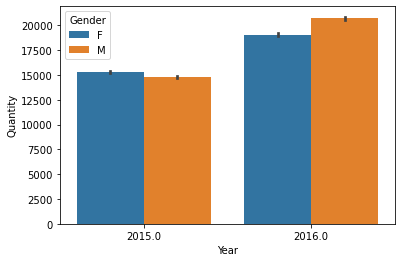

In [13]:
sns.barplot(x="Year", y= "Quantity", data= df, hue= "Gender", estimator=sum);

We see that sales volumes increased in 2016, and meanwhile, women bought more products in 2015 and men bought more products in 2016.The same situation is reflected in Sales Revenues.

### Sales Turnover by Year and Gender

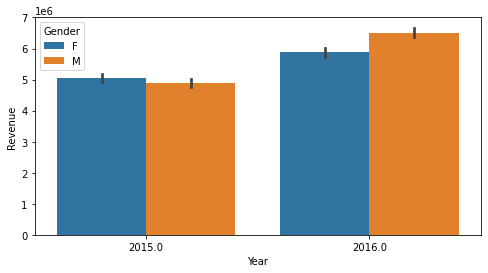

In [14]:
plt.figure(figsize=(8, 4))
sns.barplot(x="Year", y= "Revenue", hue="Gender", data= df, estimator = sum)
plt.show()

### Profits by Year and Category Breakdown

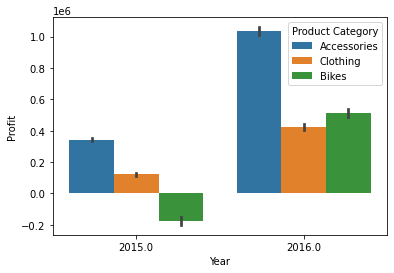

In [15]:
sns.barplot(x="Year", y= "Profit", data= df, hue= "Product Category", estimator=sum);

In a category-based evaluation, there is a net loss in bicycle sales in 2015. Accessories made good profits in both years, but in 2016, the profit increase is clearly seen in every category.

In [16]:
df.groupby(["Age segment"])[["Revenue","Profit"]].sum()

,Revenue,Profit
Age segment,,
"(0, 25]",3141072,362722.0
"(25, 32]",5612678,519153.0
"(32, 40]",5969409,586308.0
"(40, 50]",5002303,522090.0
"(50, 90]",2619114,271329.0


In [17]:
gruplar = df.groupby(["Age segment"])[["Revenue","Profit"]].sum()

### Turnovers by Age Groups

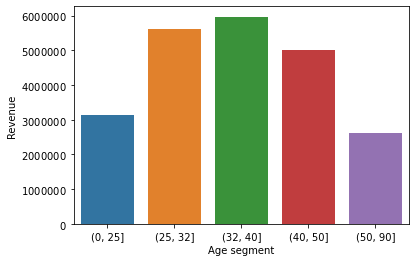

In [18]:
sns.barplot(x=gruplar.index, y= "Revenue", data= gruplar)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='y')

plt.show()

The highest turnover occurred in the 32-40, 25-32 and 40-50 age groups. The fact that it is highest in the 32-40 age group can be evaluated as a combination of purchasing power and propensity for sports. However, we have seen that 2015 and 2016 are different from each other, now let's look at what has changed in terms of years.

### Turnovers by Age Groups and Gender

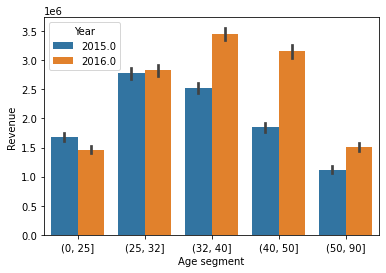

In [19]:
sns.barplot(x="Age segment", y= "Revenue", hue="Year", data=df, estimator=sum );

It is clearly seen from this graph that there are significant differences according to age groups in 2015 and 2016.

### Profit Distributions by Age

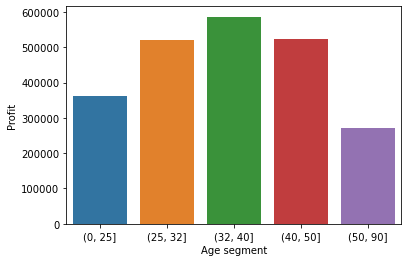

In [20]:
sns.barplot(x=gruplar.index, y= "Profit", data= gruplar,estimator=sum);

This graph gives almost the same result as turnover. Let's look at the years.

### Profits by Age and Year Breakdown

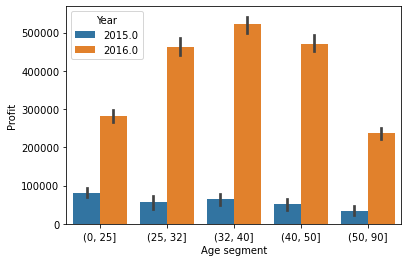

In [21]:
sns.barplot(x="Age segment", y= "Profit", hue="Year", data=df,estimator=sum );

The large increase in profits in 2016 suggests that 2015 was chosen as the year of attracting customers and 2016 as the year of making profits and that a good policy was followed. Turnover decreased in 2016 only in the 0-25 age group, but much higher profits were realized in all age groups in 2016. This supports the accuracy of the sales policy followed.

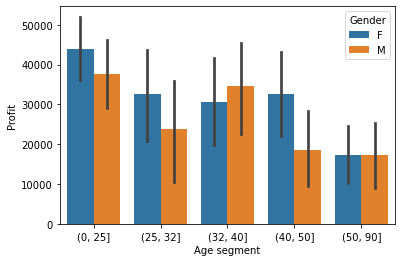

In [22]:
# Profit Distributions by Age Groups in 2015

sns.barplot(x="Age segment", y= "Profit", hue="Gender", data=df[df.Year==2015],estimator=sum );

In 2015, profits are higher only for men in the 32-40 age group. Moreover, there are obvious differences in profits, except for the 50-90 age group.

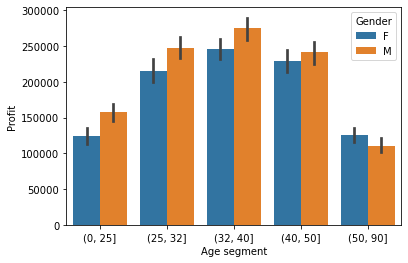

In [23]:
# Profit Distributions by Age Groups in 2016

sns.barplot(x="Age segment", y= "Profit", hue="Gender", data=df[df.Year==2016] ,estimator=sum);

The situation is very different in 2016. Profits around 20000-40000 increase to 120000-270000. In addition, profits from male customers are always higher, except for men in the 50-90 age group. The predominance, which was in women in 2015, passed to men in 2016. In the query below, the distribution of turnover and profit by years, age groups and genders can be seen together.

.

In [24]:
df.groupby(["Year", "Age segment","Gender"])[["Revenue","Profit"]].sum()

Revenue    Profit
Year   Age segment Gender                   
2015.0 (0, 25]     F        821954   43866.0
                   M        856341   37666.0
       (25, 32]    F       1428576   32634.0
                   M       1353241   23703.0
       (32, 40]    F       1336306   30557.0
                   M       1186922   34679.0
       (40, 50]    F        954790   32556.0
                   M        896280   18514.0
       (50, 90]    F        509910   17269.0
                   M        603451   17176.0
2016.0 (0, 25]     F        612808  123922.0
                   M        849969  157268.0
       (25, 32]    F       1293486  215547.0
                   M       1537375  247269.0
       (32, 40]    F       1690911  246480.0
                   M       1755270  274592.0
       (40, 50]    F       1495042  229494.0
                   M       1656191  241526.0
       (50, 90]    F        788851  126025.0
                   M        716902  110859.0

.

In [25]:
table_1 = df.groupby(["Year", "Age segment","Gender"])[["Revenue","Profit"]].sum()
table_1["profit_ratio"] = table_1.Profit *100 / table_1.Revenue
table_1

Revenue    Profit  profit_ratio
Year   Age segment Gender                                 
2015.0 (0, 25]     F        821954   43866.0      5.336795
                   M        856341   37666.0      4.398481
       (25, 32]    F       1428576   32634.0      2.284373
                   M       1353241   23703.0      1.751573
       (32, 40]    F       1336306   30557.0      2.286677
                   M       1186922   34679.0      2.921759
       (40, 50]    F        954790   32556.0      3.409755
                   M        896280   18514.0      2.065649
       (50, 90]    F        509910   17269.0      3.386676
                   M        603451   17176.0      2.846296
2016.0 (0, 25]     F        612808  123922.0     20.221994
                   M        849969  157268.0     18.502792
       (25, 32]    F       1293486  215547.0     16.664038
                   M       1537375  247269.0     16.083844
       (32, 40]    F       1690911  246480.0     14.576758
                   M       1755270  274592.0     15.643861
       (40, 50]    F       1495042  229494.0     15.350338
                   M       1656191  241526.0     14.583221
       (50, 90]    F        788851  126025.0     15.975767
                   M        716902  110859.0     15.463620

### Profits by Years and Age Groups

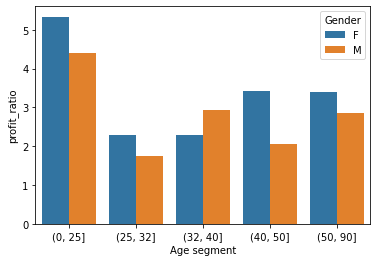

In [26]:
# YEAR 2015

table_11 = df[df.Year==2015].groupby(["Age segment","Gender"])[["Revenue","Profit"]].sum()
table_11["profit_ratio"] = table_11.Profit *100 / table_11.Revenue
table_11.reset_index(inplace=True)
#table_11
sns.barplot(x=table_11["Age segment"], y= "profit_ratio", hue= "Gender", data= table_11);

Although turnover in the 0-25 age group is higher than only the 50-90 age group, their profits are significantly higher than all other age groups. This situation; In some cases, it may be due to the fact that the payment or at least part of the payment is made by the parent, and in some cases, it may be due to the fact that money is spent on flashy products with high profit rates or expensive branded products. It can be said that this audience is perhaps a little more unconscious consumer. It is seen that women, except for the 32-40 age group, prefer products with high profit rates.

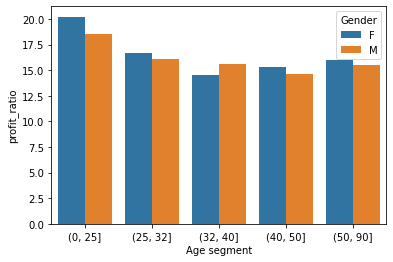

In [27]:
# YEAR 2016

table_12 = df[df.Year==2016].groupby(["Age segment","Gender"])[["Revenue","Profit"]].sum()
table_12["profit_ratio"] = table_12.Profit *100 / table_12.Revenue
table_12.reset_index(inplace=True)
sns.barplot(x="Age segment", y= "profit_ratio", hue= "Gender", data= table_12);

In 2016, the situation is changing. Again, although the most profitable group is 0-25, the rates are much closer to each other. Profit rates between men and women are also closer to each other than in 2015. Except for the 32-40 age group, women's preference for products with high profit rates has not changed. This raises the question of whether the profit rates are higher for products aimed at women. It does not seem possible to investigate this because the fact that the buyer is a woman does not mean that she buys the product for herself. If there had been a male-female classification of the products, this situation could also have been investigated.

### Now let's look at product-based evaluations.

### Price Distributions

### 2015 Unit Prices

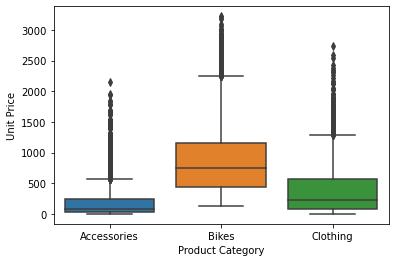

In [28]:
sns.boxplot(x = "Product Category", y = "Unit Price", data = df[df.Year==2015]);

### 2016 Unit Prices

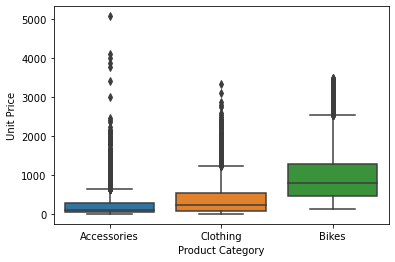

In [29]:
sns.boxplot(x = "Product Category", y = "Unit Price", data = df[df.Year==2016]);

### Turnover and Profits by Subcategory

In [30]:
# YEAR 2015
df_21= df[df.Year ==2015].groupby(["Sub Category"])[["Revenue", "Profit"]].sum().sort_values(by="Revenue", ascending = False)
df_21

,Revenue,Profit
Sub Category,,
Mountain Bikes,2496833,-92774.0
Road Bikes,2318037,-54683.0
Tires and Tubes,1189046,141132.0
Helmets,1098413,139168.0
Touring Bikes,949228,-27877.0
Jerseys,756606,72660.0
Shorts,317510,21200.0
Bottles and Cages,269824,32192.0
Vests,160145,15080.0


In [31]:
# YEAR 2016
df_22 = df[df.Year ==2016].groupby(["Sub Category"])[["Revenue", "Profit"]].sum().sort_values(by="Revenue", ascending = False)
df_22

,Revenue,Profit
Sub Category,,
Mountain Bikes,2679623,237401.0
Tires and Tubes,1676869,370992.0
Helmets,1639797,379307.0
Road Bikes,1603952,152849.0
Touring Bikes,1438682,122685.0
Jerseys,1077504,228216.0
Bottles and Cages,439583,97375.0
Shorts,371674,65844.0
Fenders,329204,71403.0


### TURNOVERS


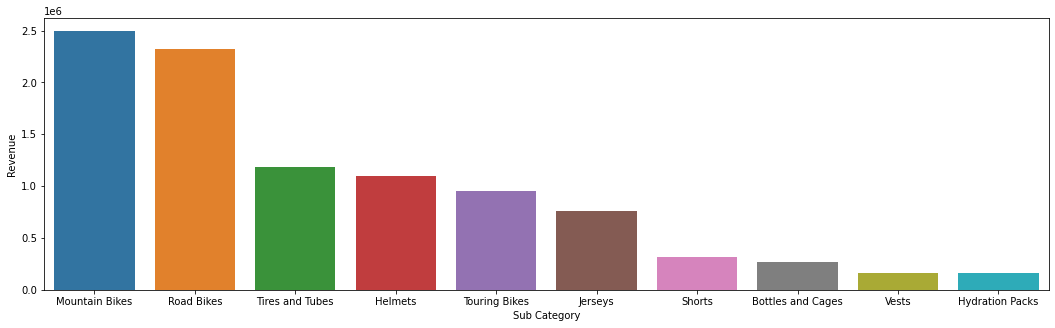

In [32]:
# 2015 

df_211 = df_21[df_21.Revenue>150000]
plt.figure(figsize=(18, 5))
sns.barplot(x= df_211.index, y= "Revenue", data =df_211);

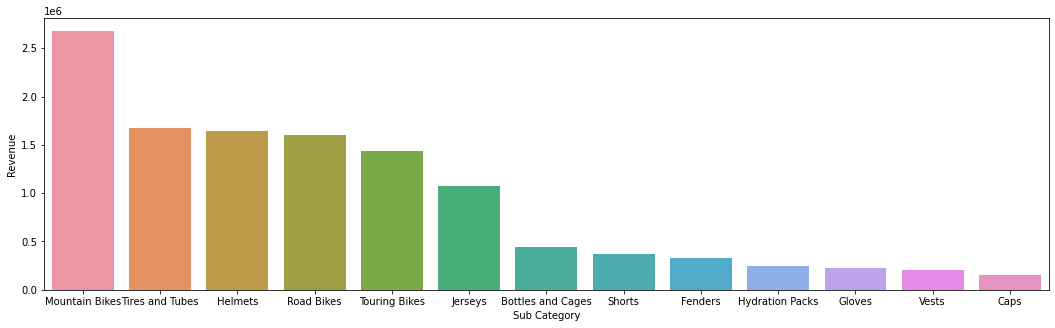

In [33]:
# 2016

df_221 = df_22[df_22.Revenue>150000]
plt.figure(figsize=(18, 5))
sns.barplot(x= df_221.index, y= "Revenue", data =df_221);

In both charts, we omitted the last 4 product lines for ease of readability.
It seems that there are 3 new product ranges in 2016 (or none of them were sold in 2015): fenders, gloves, bike racks.
In the top 5, the highest income comes from bicycle sales (a natural situation since they are expensive) and tire and helmet sales. We can say that this is due to both the expensiveness of the products and the fact that tires and helmets are almost mandatory. If so, both of them show that we are faced with conscious consumers

.

### PROFITS

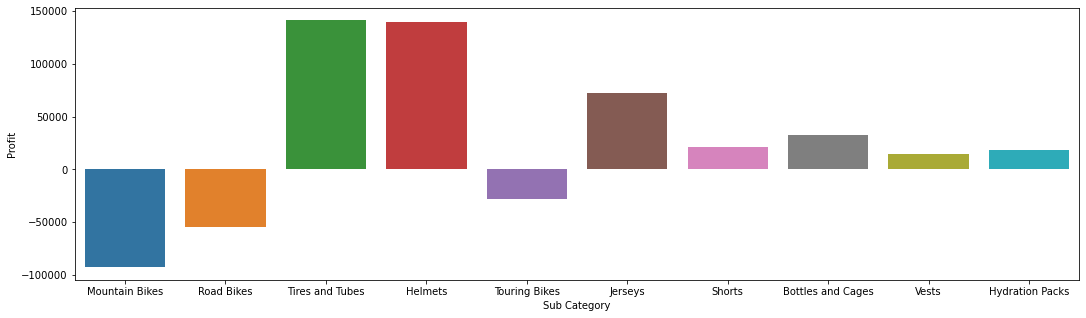

In [34]:
# 2015

plt.figure(figsize=(18, 5))
sns.barplot(x= df_211.index, y= "Profit", data =df_211);

In 2015, only bicycles made a loss, while other product groups made a small profit. The order of damage is mountain, road and tour bikes. The highest profits are on helmets and tires.

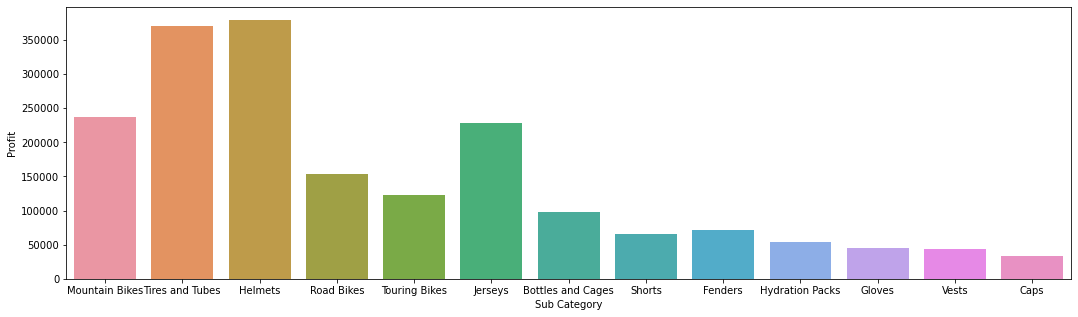

In [100]:
# 2016

plt.figure(figsize=(18, 5))
sns.barplot(x= df_221.index, y= "Profit", data =df_221);

There was no loss-making product group in 2016. The interesting thing about bicycles is that; The loss ranking for bicycles was the same in 2015, and the profit ranking was the same in 2016.
Helmets and tires are again the most profitable groups. Again, the jersey group is one of the most profitable groups.
There is also a significant increase in all profits.
Here, it is clear once again that the pricing strategy (especially regarding bicycles) has definitely paid off in 2016.

### Turnover, Total Profit, Quantity and Average Profit by Sub-Categories 2015

In [36]:
# 2015

table_21 = df[df.Year == 2015].groupby(["Sub Category"])[["Revenue", "Profit","Quantity"]].sum()
table_21["Unit profit"] = table_21.Profit  /table_21.Quantity
table_21.sort_values(by="Profit", ascending = False)

,Revenue,Profit,Quantity,Unit profit
Sub Category,,,,
Tires and Tubes,1189046,141132.0,9531.0,14.807680
Helmets,1098413,139168.0,3614.0,38.508024
Jerseys,756606,72660.0,1781.0,40.797305
Bottles and Cages,269824,32192.0,4342.0,7.414095
Shorts,317510,21200.0,534.0,39.700375
Hydration Packs,159820,18635.0,354.0,52.641243
Vests,160145,15080.0,273.0,55.238095
Caps,100875,9939.0,1243.0,7.995977
Bike Stands,74321,8495.0,154.0,55.162338


The lowest profit-making product group is socks and cleaners (except loss-making bicycles), with low unit profit and low sales. Unit profits at stands and vests are high, but sales volumes are very low. As can be seen from the query below, there are many different products where the unit price is 130 or 1900. For this reason, more product-based policies can be followed. The highest total profit is on tires and helmets; As can be seen from the query below, there are products in which the unit profit in helmets is 4 and there are products in which the unit profit is 300. Again, product-based policies can be developed. Tires are the ones with the highest sales volumes, even though the unit profit is not very high. It contains products where the unit profit can be 70 or 1. Helmets are one of the must-have products for safety. For this reason, instead of trying to keep prices low or including them in promotions, emphasis can be placed on selling featured items or including only featured items in promotions. Reviews should continue in this manner, for each subcategory.

In [37]:
df[(df["Sub Category"]=="Bike Stands")].sample(15)

,Index,Date old,Year,Month,Age,Gender,Country,Region,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,Age segment
30875,30876,2015-12-08,2015.0,December,38.0,M,UK,England,Accessories,Bike Stands,2.0,79.5,89.500000,159.0,179,20.0,"(32, 40]"
34027,34028,2015-09-23,2015.0,September,50.0,M,UK,England,Accessories,Bike Stands,2.0,159.0,180.000000,318.0,360,42.0,"(40, 50]"
26787,26788,2016-05-11,2016.0,May,35.0,F,USA,Washington,Accessories,Bike Stands,3.0,424.0,523.000000,1272.0,1569,297.0,"(32, 40]"
12249,12250,2016-04-24,2016.0,April,36.0,F,Germany,Hessen,Accessories,Bike Stands,3.0,106.0,159.333333,318.0,478,160.0,"(32, 40]"
15424,15425,2016-04-19,2016.0,April,32.0,M,France,Seine (Paris),Accessories,Bike Stands,2.0,238.5,402.500000,477.0,805,328.0,"(25, 32]"
27272,27273,2015-10-12,2015.0,October,25.0,M,USA,California,Accessories,Bike Stands,1.0,477.0,542.000000,477.0,542,65.0,"(0, 25]"
28485,28486,2016-04-28,2016.0,April,35.0,M,UK,England,Accessories,Bike Stands,1.0,1431.0,1852.000000,1431.0,1852,421.0,"(32, 40]"
25283,25284,2016-04-20,2016.0,April,24.0,M,France,Nord,Accessories,Bike Stands,3.0,159.0,211.333333,477.0,634,157.0,"(0, 25]"
8642,8643,2016-03-22,2016.0,March,41.0,M,USA,Washington,Accessories,Bike Stands,2.0,477.0,576.500000,954.0,1153,199.0,"(40, 50]"
5665,5666,2016-03-17,2016.0,March,54.0,F,UK,England,Accessories,Bike Stands,1.0,318.0,415.000000,318.0,415,97.0,"(50, 90]"


In [38]:
df[(df["Sub Category"]=="Helmets")].sample(15)

,Index,Date old,Year,Month,Age,Gender,Country,Region,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,Age segment
28190,28191,2015-12-01,2015.0,December,28.0,F,USA,California,Accessories,Helmets,1.0,910.00,965.000000,910.0,965,55.0,"(25, 32]"
19248,19249,2015-09-20,2015.0,September,25.0,M,UK,England,Accessories,Helmets,1.0,175.00,196.000000,175.0,196,21.0,"(0, 25]"
20066,20067,2015-12-03,2015.0,December,31.0,F,USA,California,Accessories,Helmets,3.0,338.33,393.000000,1015.0,1179,164.0,"(25, 32]"
20,21,2015-09-24,2015.0,September,29.0,F,USA,Washington,Accessories,Helmets,3.0,326.67,359.666667,980.0,1079,99.0,"(25, 32]"
6048,6049,2015-12-07,2015.0,December,56.0,M,USA,Washington,Accessories,Helmets,2.0,17.50,20.500000,35.0,41,6.0,"(50, 90]"
9339,9340,2015-12-02,2015.0,December,26.0,M,USA,Oregon,Accessories,Helmets,2.0,87.50,93.000000,175.0,186,11.0,"(25, 32]"
10114,10115,2016-04-19,2016.0,April,81.0,F,Germany,Nordrhein-Westfalen,Accessories,Helmets,2.0,262.50,401.500000,525.0,803,278.0,"(50, 90]"
2520,2521,2016-05-29,2016.0,May,41.0,F,Germany,Hessen,Accessories,Helmets,2.0,175.00,267.500000,350.0,535,185.0,"(40, 50]"
32877,32878,2016-04-29,2016.0,April,44.0,M,USA,California,Accessories,Helmets,2.0,525.00,652.500000,1050.0,1305,255.0,"(40, 50]"
17929,17930,2015-12-30,2015.0,December,19.0,M,UK,England,Accessories,Helmets,2.0,210.00,238.000000,420.0,476,56.0,"(0, 25]"


In [39]:
df[(df["Sub Category"]=="Tires and Tubes")].sample(15)

,Index,Date old,Year,Month,Age,Gender,Country,Region,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,Age segment
32505,32506,2016-05-02,2016.0,May,50.0,M,USA,California,Accessories,Tires and Tubes,2.0,22.50,24.500000,45.0,49,4.0,"(40, 50]"
934,935,2016-06-26,2016.0,June,45.0,M,France,Hauts de Seine,Accessories,Tires and Tubes,1.0,10.00,14.000000,10.0,14,4.0,"(40, 50]"
32407,32408,2015-10-22,2015.0,October,47.0,M,Germany,Nordrhein-Westfalen,Accessories,Tires and Tubes,2.0,34.50,48.500000,69.0,97,28.0,"(40, 50]"
31976,31977,2015-09-15,2015.0,September,21.0,F,USA,California,Accessories,Tires and Tubes,2.0,326.00,375.500000,652.0,751,99.0,"(0, 25]"
6521,6522,2016-05-08,2016.0,May,31.0,M,Germany,Hessen,Accessories,Tires and Tubes,2.0,10.00,15.000000,20.0,30,10.0,"(25, 32]"
30570,30571,2016-06-01,2016.0,June,31.0,F,UK,England,Accessories,Tires and Tubes,1.0,290.00,354.000000,290.0,354,64.0,"(25, 32]"
33622,33623,2015-12-01,2015.0,December,24.0,F,USA,California,Accessories,Tires and Tubes,3.0,33.33,38.333333,100.0,115,15.0,"(0, 25]"
27940,27941,2016-06-21,2016.0,June,20.0,M,USA,California,Accessories,Tires and Tubes,1.0,96.00,110.000000,96.0,110,14.0,"(0, 25]"
29635,29636,2016-04-11,2016.0,April,41.0,F,USA,Oregon,Accessories,Tires and Tubes,1.0,150.00,185.000000,150.0,185,35.0,"(40, 50]"
6083,6084,2016-04-03,2016.0,April,24.0,F,Germany,Bayern,Accessories,Tires and Tubes,1.0,30.00,45.000000,30.0,45,15.0,"(0, 25]"


### Turnover, Total Profit, Quantity and Average Profit by Sub-Categories 2016

In [40]:
# 2016
table_22 = df[df.Year == 2016].groupby(["Sub Category"])[["Revenue", "Profit","Quantity"]].sum()
table_22["Unit profit"] = table_22.Profit  /table_22.Quantity
table_22.sort_values(by="Profit", ascending = False)

,Revenue,Profit,Quantity,Unit profit
Sub Category,,,,
Helmets,1639797,379307.0,4773.0,79.469307
Tires and Tubes,1676869,370992.0,12682.0,29.253430
Mountain Bikes,2679623,237401.0,2737.0,86.737669
Jerseys,1077504,228216.0,2252.0,101.339254
Road Bikes,1603952,152849.0,2551.0,59.917287
Touring Bikes,1438682,122685.0,1521.0,80.660750
Bottles and Cages,439583,97375.0,6216.0,15.665219
Fenders,329204,71403.0,1494.0,47.793173
Shorts,371674,65844.0,595.0,110.662185


Tires and Tubes, Helmets and Jerseys are again among the most profitable products. As we mentioned before, bicycles are also starting to make a profit in 2016, and when sales figures and profit rates are combined, they are at the top of the total profit.
The last 4 remain unchanged, unit profits have at least doubled, but they continue to be the least profitable products. The investigations may continue in this way.

Now let's move on to comparing unit profits.

In [41]:
table_21.rename(columns={"Unit profit":"Unit Profit 2015"}, inplace = True)
table_22.rename(columns={"Unit profit":"Unit Profit 2016"}, inplace = True)
table_23 = pd.concat([table_21["Unit Profit 2015"], table_22["Unit Profit 2016"]], axis = 1)

In [42]:
table_23.reset_index(inplace= True)
table_23.sort_values(by="Unit Profit 2016")

,Sub Category,Unit Profit 2015,Unit Profit 2016
1,Bottles and Cages,7.414095,15.665219
3,Cleaners,8.894977,16.216867
10,Socks,4.911672,18.438799
2,Caps,7.995977,18.948227
11,Tires and Tubes,14.807680,29.253430
15,Fenders,NaN,47.793173
16,Gloves,NaN,50.182913
8,Road Bikes,-15.325953,59.917287
4,Helmets,38.508024,79.469307
12,Touring Bikes,-24.198785,80.660750


In [43]:
table_24= table_23[table_23["Unit Profit 2016"]>79.5]
table_24= table_24.sort_values(by= "Unit Profit 2016")
table_24

,Sub Category,Unit Profit 2015,Unit Profit 2016
12,Touring Bikes,-24.198785,80.660750
7,Mountain Bikes,-33.589428,86.737669
6,Jerseys,40.797305,101.339254
9,Shorts,39.700375,110.662185
0,Bike Stands,55.162338,112.040000
13,Vests,55.238095,119.184573
5,Hydration Packs,52.641243,124.319444
14,Bike Racks,NaN,171.049020


In [44]:
table_25= table_23[table_23["Unit Profit 2016"]<79.5]
table_25= table_25.sort_values(by= "Unit Profit 2016")
table_25

,Sub Category,Unit Profit 2015,Unit Profit 2016
1,Bottles and Cages,7.414095,15.665219
3,Cleaners,8.894977,16.216867
10,Socks,4.911672,18.438799
2,Caps,7.995977,18.948227
11,Tires and Tubes,14.807680,29.253430
15,Fenders,NaN,47.793173
16,Gloves,NaN,50.182913
8,Road Bikes,-15.325953,59.917287
4,Helmets,38.508024,79.469307


### Unit Profit by Year and Subcategory

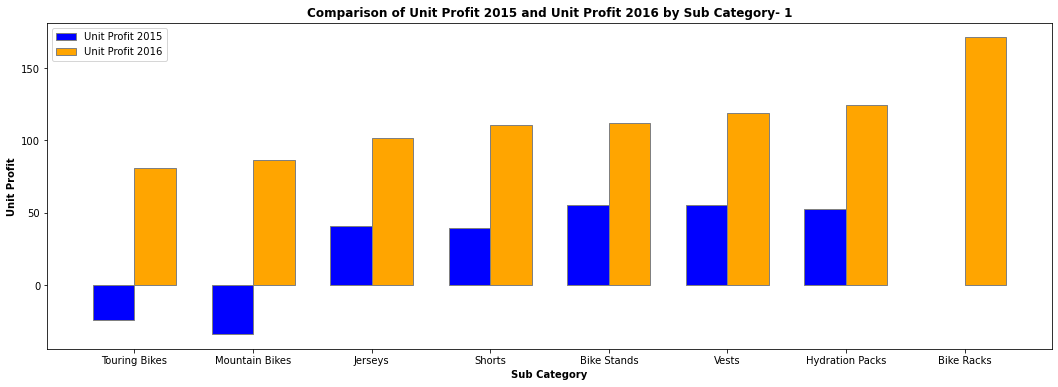

In [102]:
# Highest unit profits in 2015 compared to 2016
plt.figure(figsize=(18, 6))

bar_width = 0.35
r1 = range(len(table_24['Sub Category']))
r2 = [x + bar_width for x in r1]

plt.bar(r1, table_24['Unit Profit 2015'], color='blue', width=bar_width, edgecolor='grey', label='Unit Profit 2015')
plt.bar(r2, table_24['Unit Profit 2016'], color='orange', width=bar_width, edgecolor='grey', label='Unit Profit 2016')

plt.xlabel('Sub Category', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(table_24['Sub Category']))], table_24['Sub Category'])

plt.ylabel('Unit Profit', fontweight='bold')
plt.title('Comparison of Unit Profit 2015 and Unit Profit 2016 by Sub Category- 1', fontweight='bold')
plt.legend()

plt.show()

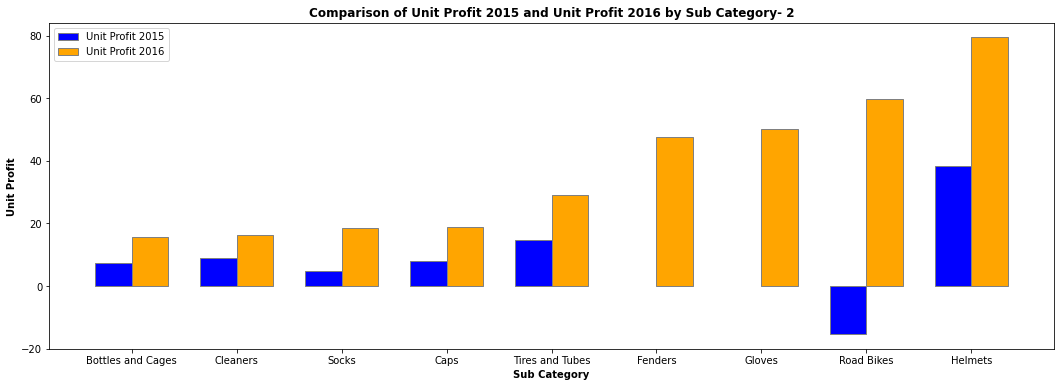

In [103]:
# Lowest unit profits in 2015 compared to 2016
plt.figure(figsize=(18, 6))

bar_width = 0.35
r1 = range(len(table_25['Sub Category']))
r2 = [x + bar_width for x in r1]

plt.bar(r1, table_25['Unit Profit 2015'], color='blue', width=bar_width, edgecolor='grey', label='Unit Profit 2015')
plt.bar(r2, table_25['Unit Profit 2016'], color='orange', width=bar_width, edgecolor='grey', label='Unit Profit 2016')

plt.xlabel('Sub Category', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(table_25['Sub Category']))], table_25['Sub Category'])

plt.ylabel('Unit Profit', fontweight='bold')
plt.title('Comparison of Unit Profit 2015 and Unit Profit 2016 by Sub Category- 2', fontweight='bold')
plt.legend()

plt.show()

As can be seen, there is an increase in each unit profit, with a 3-4 times increase in some product groups.
It is seen that the Bike Racks group, which was added in 2016, has the highest unit profit.

In [47]:
table_21.rename(columns={"Quantity":"Quantity 2015"}, inplace = True)
table_22.rename(columns={"Quantity":"Quantity 2016"}, inplace = True)
table_26 = pd.concat([table_21["Quantity 2015"], table_22["Quantity 2016"]], axis = 1)
table_26.reset_index(inplace= True)

In [48]:
table_27= table_26[table_26["Quantity 2016"]>1000]
table_27= table_27.sort_values(by= "Quantity 2016")
table_28= table_26[table_26["Quantity 2016"]<1000]
table_28= table_28.sort_values(by= "Quantity 2016")

In [49]:
table_27

,Sub Category,Quantity 2015,Quantity 2016
15,Fenders,NaN,1494.0
12,Touring Bikes,1152.0,1521.0
2,Caps,1243.0,1777.0
6,Jerseys,1781.0,2252.0
8,Road Bikes,3568.0,2551.0
7,Mountain Bikes,2762.0,2737.0
4,Helmets,3614.0,4773.0
1,Bottles and Cages,4342.0,6216.0
11,Tires and Tubes,9531.0,12682.0


In [50]:
table_28

,Sub Category,Quantity 2015,Quantity 2016
0,Bike Stands,154.0,150.0
14,Bike Racks,NaN,204.0
13,Vests,273.0,363.0
5,Hydration Packs,354.0,432.0
10,Socks,317.0,433.0
9,Shorts,534.0,595.0
3,Cleaners,438.0,664.0
16,Gloves,NaN,913.0


### Comparison of Sales Quantities Based on Year and Sub Categories

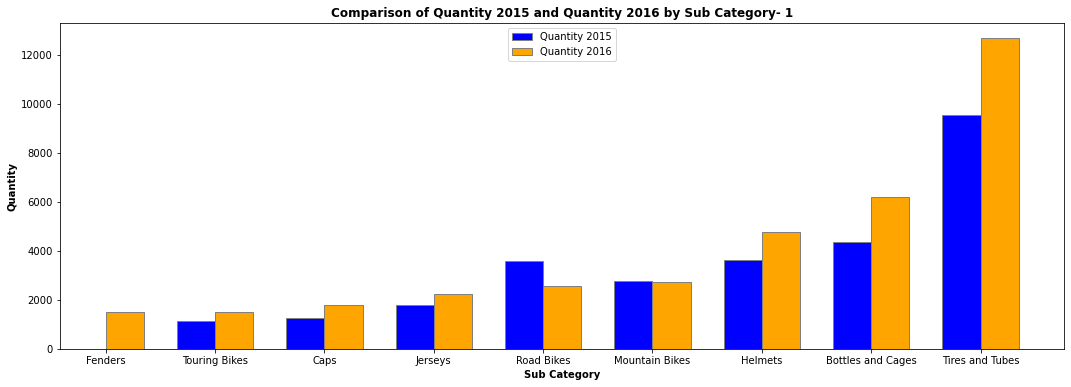

In [104]:
# Sales Quantities more than 1000 
plt.figure(figsize=(18, 6))

bar_width = 0.35
r1 = range(len(table_27['Sub Category']))
r2 = [x + bar_width for x in r1]

plt.bar(r1, table_27['Quantity 2015'], color='blue', width=bar_width, edgecolor='grey', label='Quantity 2015')
plt.bar(r2, table_27['Quantity 2016'], color='orange', width=bar_width, edgecolor='grey', label='Quantity 2016')

plt.xlabel('Sub Category', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(table_27['Sub Category']))], table_27['Sub Category'])

plt.ylabel('Quantity', fontweight='bold')
plt.title('Comparison of Quantity 2015 and Quantity 2016 by Sub Category- 1', fontweight='bold')
plt.legend()

plt.show()

Road Bike satış adetlerinde belirgin, mountain bike satış adetlerinde çok çok az bir düşüş görülmekte. Buna rağmen karların artmış olması fiyat politikasının doğruluğunu göstermekte. Bunlar dışındaki tüm ürünlerin adetlerinde artış gözlenmekte. Fenders ürünleri ise satışa yeni başlamış olmalarına rağmen 1500 gibi bir satış adedine ulaşmış. 


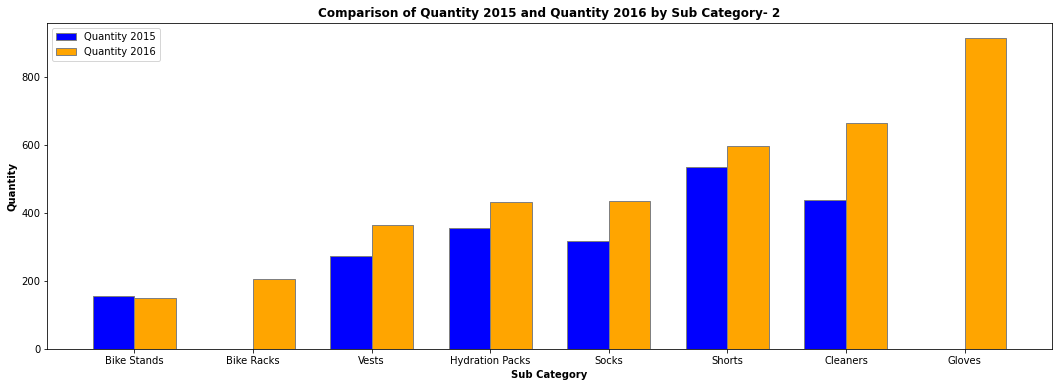

In [105]:
# Sales Quantities less than 1000
plt.figure(figsize=(18, 6))

bar_width = 0.35
r1 = range(len(table_28['Sub Category']))
r2 = [x + bar_width for x in r1]

plt.bar(r1, table_28['Quantity 2015'], color='blue', width=bar_width, edgecolor='grey', label='Quantity 2015')
plt.bar(r2, table_28['Quantity 2016'], color='orange', width=bar_width, edgecolor='grey', label='Quantity 2016')

plt.xlabel('Sub Category', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(table_28['Sub Category']))], table_28['Sub Category'])

plt.ylabel('Quantity', fontweight='bold')
plt.title('Comparison of Quantity 2015 and Quantity 2016 by Sub Category- 2', fontweight='bold')
plt.legend()

plt.show()

There is a significant increase in the sales of all except bike stands. (Although there was a slight decrease in the sales of bike stands products, the profitability increased significantly) The newly introduced bike racks were products with high profitability, although they were not large in quantity. Even though Gloves is a new entry, it has reached nearly 1000 sales. In general, we can say that despite the price increases, profitability has increased significantly.

.

Now Let's Look at the Price Distributions of Bicycles

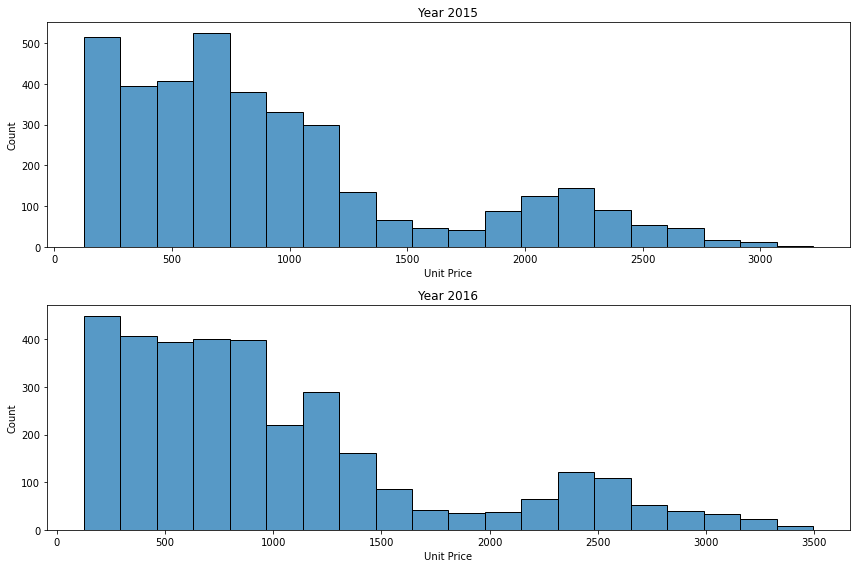

In [53]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(df[(df.Year == 2015) & (df["Product Category"] == "Bikes")]["Unit Price"], bins=20, kde=False)
plt.title('Year 2015')

plt.subplot(2, 1, 2)
sns.histplot(df[(df.Year == 2016) & (df["Product Category"] == "Bikes")]["Unit Price"], bins=20, kde=False)
plt.title('Year 2016')

plt.tight_layout()
plt.show()

Profit Distributions of Bicycles

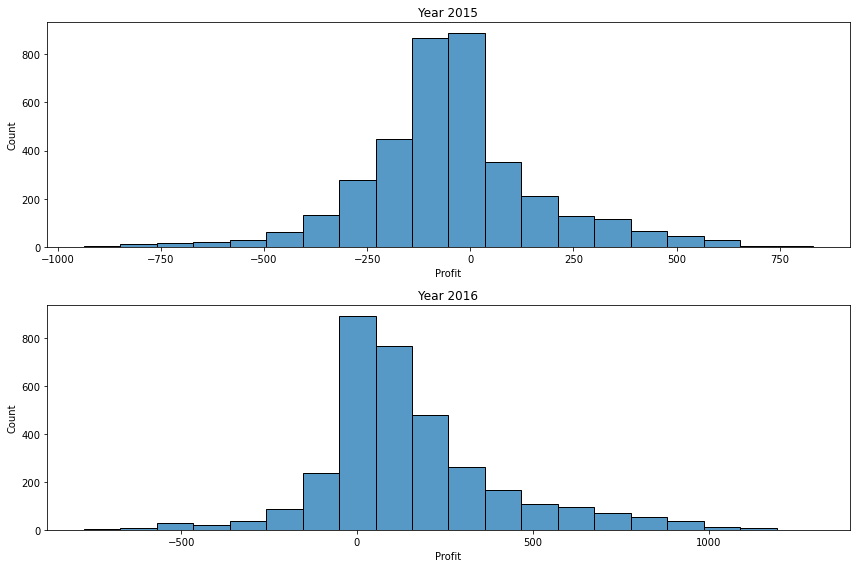

In [54]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(df[(df.Year == 2015) & (df["Product Category"] == "Bikes")]["Profit"], bins=20, kde=False)
plt.title('Year 2015')

plt.subplot(2, 1, 2)
sns.histplot(df[(df.Year == 2016) & (df["Product Category"] == "Bikes")]["Profit"], bins=20, kde=False)
plt.title('Year 2016')

plt.tight_layout()
plt.show()

In 2015, bicycle sales were dominated by bicycles sold with a very low profit, a low loss, or no profit or loss. In 2016, bicycles sold without profit or loss or with little profit (0-500) dominated. While the number of bicycles sold with a profit of over 500 in 2015 was very low, bicycles sold with a profit of over 500 in 2016 also achieved significant sales.

.

In [106]:
# 2015 CATEGORY BASED

table_3 = df[df.Year ==2015].groupby(["Product Category"])[["Revenue","Profit"]].sum().sort_values(by="Profit", ascending = False)
table_3["profit_ratio"] = table_3.Profit *100 / table_3.Revenue
table_3

,Revenue,Profit,profit_ratio
Product Category,,,
Accessories,2825767,343518.0,12.156629
Clothing,1357906,120436.0,8.869244
Bikes,5764098,-175334.0,-3.041829


In [107]:
# 2016 CATEGORY BASED

table_4 = df[df.Year ==2016].groupby(["Product Category"])[["Revenue","Profit"]].sum().sort_values(by="Profit", ascending = False)
table_4["profit_ratio"] = table_4.Profit *100 / table_4.Revenue
table_4

,Revenue,Profit,profit_ratio
Product Category,,,
Accessories,4594897,1035251.0,22.530451
Bikes,5722257,512935.0,8.963858
Clothing,2079651,424796.0,20.426312


When we look at the overall evaluation of the categories, we see that accessories brought the highest profit in both years. Profit rate increased from 12% to 22%. The profit rate of clothes increased from 8.9% to 20.4%. Bicycles increased from 3% loss to 9% profit. Due to sales numbers and prices, bicycles have surpassed clothing items in total profit.

.

In [57]:
bikes_15= df[(df.Year==2015) & (df["Product Category"] == "Bikes")].Revenue.sum()
bikes_p_15= df[(df.Year==2015) & (df["Product Category"] == "Bikes")].Profit.sum()
print(f"Bikes' Revenue 2015 = {bikes_15},   Bikes' Profit 2015 = {bikes_p_15}")

Bikes' Revenue 2015 = 5764098,   Bikes' Profit 2015 = -175334.0


In [58]:
others_15 = df[(df.Year==2015) & (df["Product Category"] != "Bikes")].Revenue.sum()
others_p_15 = df[(df.Year==2015) & (df["Product Category"] != "Bikes")].Profit.sum()
print(f"Others' Revenue 2015 = {others_15},   Others' Profit 2015 = {others_p_15}")

Others' Revenue 2015 = 4183673,   Others' Profit 2015 = 463954.0


In [59]:
print(f"Others/Bikes 2015 Profit Ratio = {others_p_15/bikes_p_15}")
print(f"Others/Bikes 2015 Revenue Ratio = {others_15/bikes_15}")

Others/Bikes 2015 Profit Ratio = -2.6461154140098326
Others/Bikes 2015 Revenue Ratio = 0.725815730405694


In [60]:
bikes_16= df[(df.Year==2016) & (df["Product Category"] == "Bikes")].Revenue.sum()
bikes_p_16= df[(df.Year==2016) & (df["Product Category"] == "Bikes")].Profit.sum()
print(f"Bikes' Revenue 2016 = {bikes_16},   Bikes' Profit 2016 = {bikes_p_16}")

Bikes' Revenue 2016 = 5722257,   Bikes' Profit 2016 = 512935.0


In [61]:
others_16 = df[(df.Year==2016) & (df["Product Category"] != "Bikes")].Revenue.sum()
others_p_16 = df[(df.Year==2016) & (df["Product Category"] != "Bikes")].Profit.sum()
print(f"Others' Revenue 2016 = {others_16},   Others' Profit 2016 = {others_p_16}")

Others' Revenue 2016 = 6674548,   Others' Profit 2016 = 1460047.0


In [62]:
print(f"Others/Bikes 2016 Profit Ratio = {others_p_16/bikes_p_16}")
print(f"Others/Bikes 2016 Revenue Ratio = {others_16/bikes_16}")

Others/Bikes 2016 Profit Ratio = 2.8464561786581144
Others/Bikes 2016 Revenue Ratio = 1.166418774969387


The above 3 queries are again important in summarizing the status of clothing and accessories.
While clothing and accessory revenues were 0.7 times the bicycle revenues in 2015, they increased to 1.16 times in 2016. Despite the huge increase in bicycles' profits in 2016, accessories and clothing still bring in 2.8 times more profit than bicycles.

### Sales Made at a Loss - 2015

In [63]:

table_5 = df[(df.Year==2015) & (df.Profit<0)].groupby(["Sub Category"])[["Revenue", "Profit"]].sum()
table_5.rename(columns={'Profit': 'Loss'}, inplace=True)
table_5

,Revenue,Loss
Sub Category,,
Bike Stands,4682,-88.0
Bottles and Cages,17750,-1911.0
Caps,18167,-1678.0
Cleaners,2350,-205.0
Helmets,70437,-6668.0
Hydration Packs,8863,-597.0
Jerseys,121871,-9131.0
Mountain Bikes,1623104,-175204.0
Road Bikes,1369362,-149925.0


### Sales Made at a Loss - 2016

In [64]:

table_6 = df[(df.Year==2016) & (df.Profit<0)].groupby(["Sub Category"])[["Revenue", "Profit"]].sum()
table_6.rename(columns={'Profit': 'Loss'}, inplace=True)
table_6

,Revenue,Loss
Sub Category,,
Bike Racks,2339,-61.0
Bike Stands,1817,-91.0
Bottles and Cages,7508,-724.0
Caps,2824,-335.0
Cleaners,500,-41.0
Fenders,4276,-474.0
Gloves,4828,-510.0
Helmets,35338,-3652.0
Hydration Packs,1770,-155.0


### Sales made with profit - 2015

In [65]:

table_7 = df[(df.Year==2015) & (df.Profit>0)].groupby(["Sub Category"])[["Revenue", "Profit"]].sum()
table_7.rename(columns={'Revenue': '+ Revenue'}, inplace=True)
table_7

,+ Revenue,Profit
Sub Category,,
Bike Stands,69639,8583.0
Bottles and Cages,247290,34103.0
Caps,81619,11617.0
Cleaners,31404,4101.0
Helmets,1026786,145836.0
Hydration Packs,150847,19232.0
Jerseys,633699,81791.0
Mountain Bikes,866296,82430.0
Road Bikes,943195,95242.0


### Sales made with profit - 2016

In [66]:

table_8 = df[(df.Year==2016) & (df.Profit>0)].groupby(["Sub Category"])[["Revenue", "Profit"]].sum()
table_8.rename(columns={'Revenue': '+ Revenue'}, inplace=True)
table_8

,+ Revenue,Profit
Sub Category,,
Bike Racks,138515,34955.0
Bike Stands,74773,16897.0
Bottles and Cages,431640,98099.0
Caps,151960,34006.0
Cleaners,48036,10809.0
Fenders,324335,71877.0
Gloves,223501,46327.0
Helmets,1604424,382959.0
Hydration Packs,241686,53861.0


In the queries above, information about sales made at a loss and sales made at a profit can be seen. Below, both queries are combined and compared.

### 2015 - Product Based PROFIT/LOSS Ratios

In [67]:
table_9 = pd.concat([table_5, table_7], axis = 1)
table_9["L/P Ratio"] = -table_9.Loss*100/table_9["Profit"]
table_9.reset_index(inplace=True)
table_9

,Sub Category,Revenue,Loss,+ Revenue,Profit,L/P Ratio
0,Bike Stands,4682,-88.0,69639,8583.0,1.025283
1,Bottles and Cages,17750,-1911.0,247290,34103.0,5.603613
2,Caps,18167,-1678.0,81619,11617.0,14.444349
3,Cleaners,2350,-205.0,31404,4101.0,4.998781
4,Helmets,70437,-6668.0,1026786,145836.0,4.572259
5,Hydration Packs,8863,-597.0,150847,19232.0,3.104201
6,Jerseys,121871,-9131.0,633699,81791.0,11.163820
7,Mountain Bikes,1623104,-175204.0,866296,82430.0,212.548829
8,Road Bikes,1369362,-149925.0,943195,95242.0,157.414796
9,Shorts,62705,-4985.0,253125,26185.0,19.037617


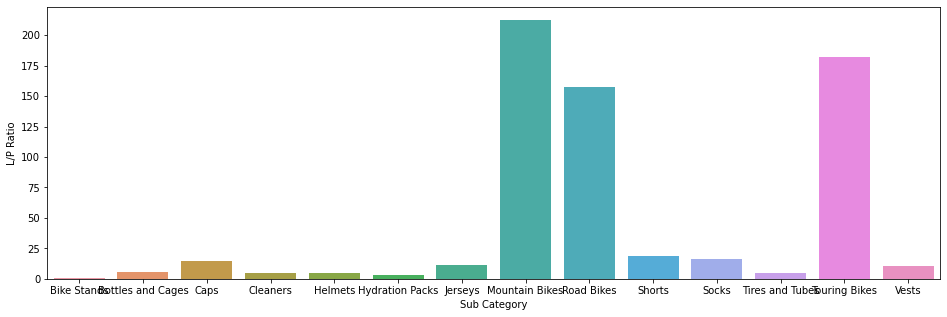

In [68]:
plt.figure(figsize=(16, 5))
sns.barplot(x = "Sub Category", y = "L/P Ratio", data = table_9);


As can be seen, sales were made at both a loss and a profit in every product group in 2015. Only in bicycles, serious losses were incurred because sales at a loss were much higher than those made at a profit.

### 2016 - Product Based PROFIT/LOSS Ratios

In [69]:
table_10 = pd.concat([table_6, table_8], axis = 1)
table_10["L/P Ratio"] = -table_10.Loss*100/table_10["Profit"]
table_10.reset_index(inplace=True)
table_10

,Sub Category,Revenue,Loss,+ Revenue,Profit,L/P Ratio
0,Bike Racks,2339,-61.0,138515,34955.0,0.174510
1,Bike Stands,1817,-91.0,74773,16897.0,0.538557
2,Bottles and Cages,7508,-724.0,431640,98099.0,0.738030
3,Caps,2824,-335.0,151960,34006.0,0.985120
4,Cleaners,500,-41.0,48036,10809.0,0.379314
5,Fenders,4276,-474.0,324335,71877.0,0.659460
6,Gloves,4828,-510.0,223501,46327.0,1.100870
7,Helmets,35338,-3652.0,1604424,382959.0,0.953627
8,Hydration Packs,1770,-155.0,241686,53861.0,0.287778
9,Jerseys,37009,-3445.0,1038875,231661.0,1.487087


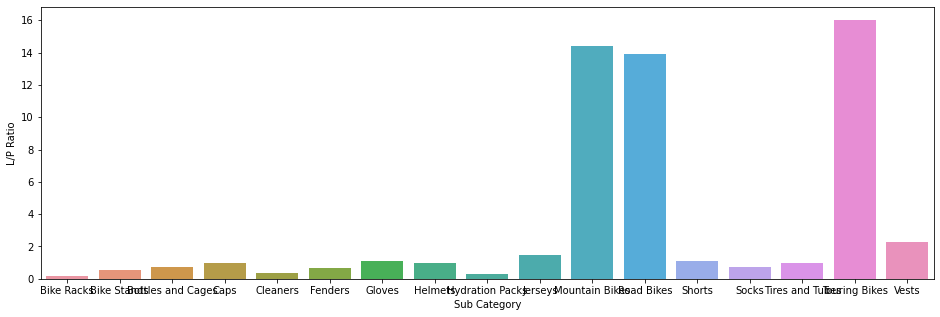

In [70]:
plt.figure(figsize=(16, 5))
sns.barplot(x = "Sub Category", y = "L/P Ratio", data = table_10);

In 2016, sales were made both at a profit and at a loss in every product group, but those sold at a loss remained at a very low rate.
Although the ratio of loss sales to profitable sales in bicycles was 13%, 14% and 16%, a good profit was made in total.

### Sales by Month

### 2015

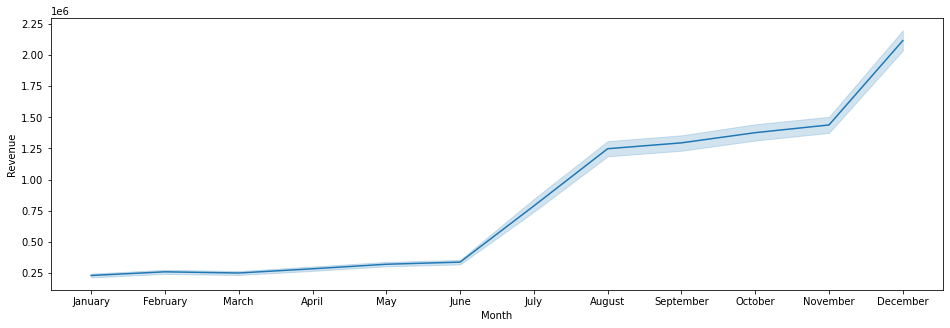

In [71]:
plt.figure(figsize=(16, 5))
df['Month'] = pd.Categorical(df['Month'], 
            categories=['January', 'February', 'March', 'April', 'May', 'June', 
                        'July', 'August','September','October','November','December'], ordered=True)
sns.lineplot(x = "Month", y = "Revenue", data = df[df.Year==2015], estimator=sum);

There is very low activity for the first 6 months, then the turnover begins to multiply very quickly and peaks in December. This situation creates the impression that it requires detailed examination. Let's focus on the turnover increase that started in July.

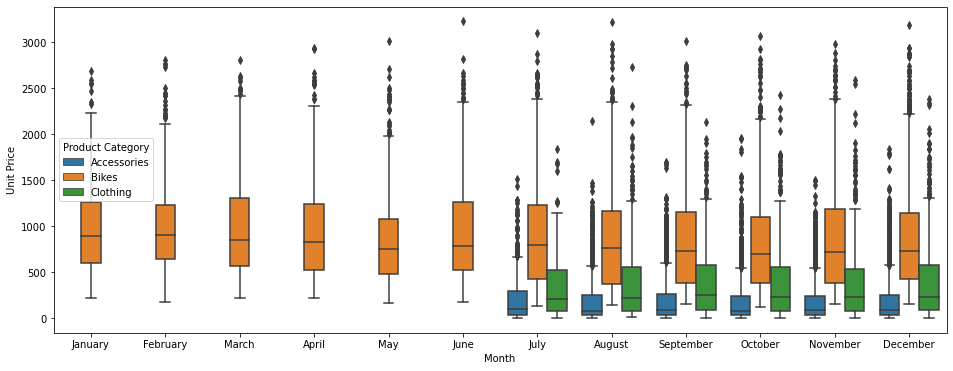

In [72]:
plt.figure(figsize=(16, 6))
sns.boxplot(x = "Month", y = "Unit Price", hue="Product Category", 
            data=df[df.Year==2015] );

As can be clearly seen from the graph, the reason for the rapid rise that started in July is the start of sales of accessories and clothing in this month.
And these suddenly cause the turnover to double. Additionally, there is a downward trend in bicycle prices after July. This situation may have caused losses, but increased sales may have also increased turnover. Let's also look at the profits for the same period.

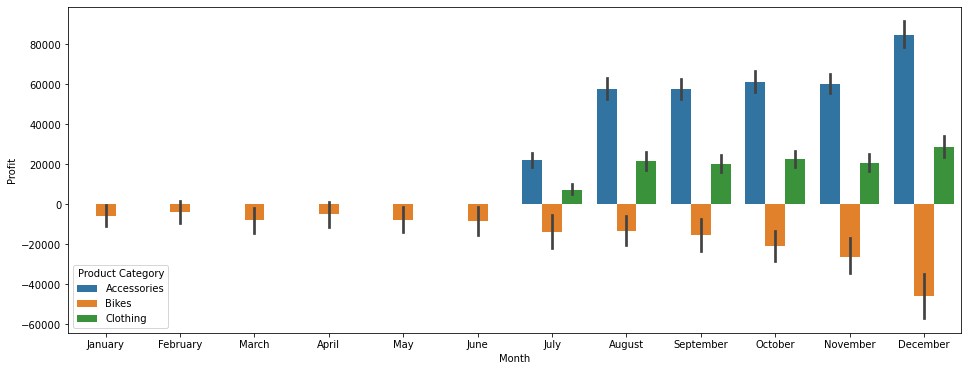

In [73]:
plt.figure(figsize=(16, 6))
sns.barplot(x = "Month", y = "Profit", hue="Product Category", estimator = sum,
            data=df[df.Year==2015] );

The above chart showing the total profits clearly reveals that; Both the increase in sales at a loss in bicycles (as a result, sales increased) and the sales of accessories and clothing were effective in the rapid increase in turnover. Sales of accessories and clothing started in July, rose suddenly in August, and reached their peak in December. Let's also add that in the first 6 months, it made a constant loss only from bicycle sales, and then the most important factor that made the company profitable was accessories.

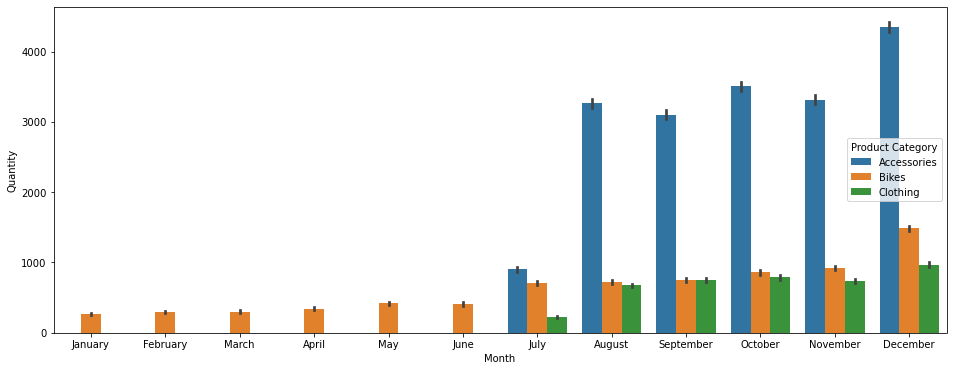

In [74]:
plt.figure(figsize=(16, 6))
sns.barplot(x = "Month", y = "Quantity", hue = "Product Category", estimator= sum, data = df[df.Year==2015]); 

Profits from sales of accessories and clothing, which started in July, allowed further price reductions on bicycles, which increased turnover by increasing bicycle sales (most notably in December). After August, sales of all products increased significantly in December. The impact of the discounts in July and December on bicycle sales was also clearly reflected in the sales.

### 2016

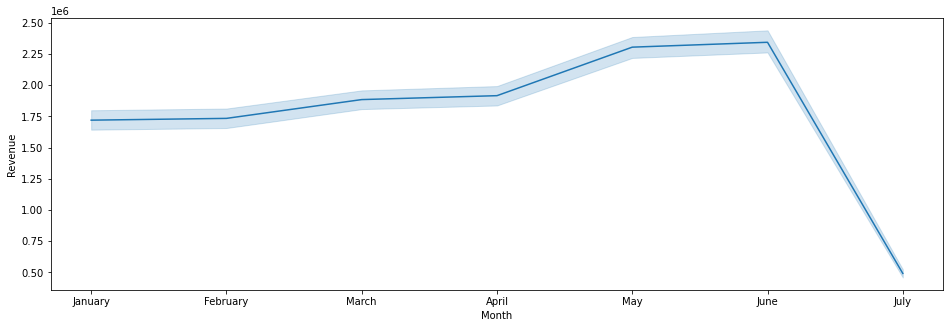

In [75]:
plt.figure(figsize=(16, 5))
df['Month'] = pd.Categorical(df['Month'], 
            categories=['January', 'February', 'March', 'April', 'May', 'June', 
                        'July', 'August','September','October','November','December'], ordered=True)
sns.lineplot(x = "Month", y = "Revenue", data = df[df.Year==2016], estimator=sum);

While the first 6 months of 2016 brought a continuous increase in turnover, a sudden decrease is observed in July. Let's look at sales first.

### 2016 Sales Quantities

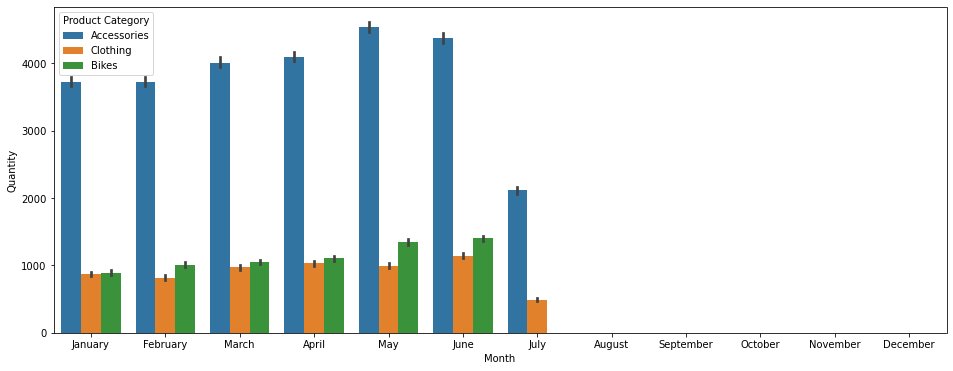

In [76]:
plt.figure(figsize=(16, 6))
sns.barplot(x = "Month", y = "Quantity", hue = "Product Category", estimator= sum, data = df[df.Year==2016]); 

With a few exceptions, an increase in the sales volumes of all product groups is observed until June. However, while accessories and clothing experienced a critical decline in July, bicycle sales are falling to zero. Maybe unit prices can give a clue.

### 2016 Unit Prices

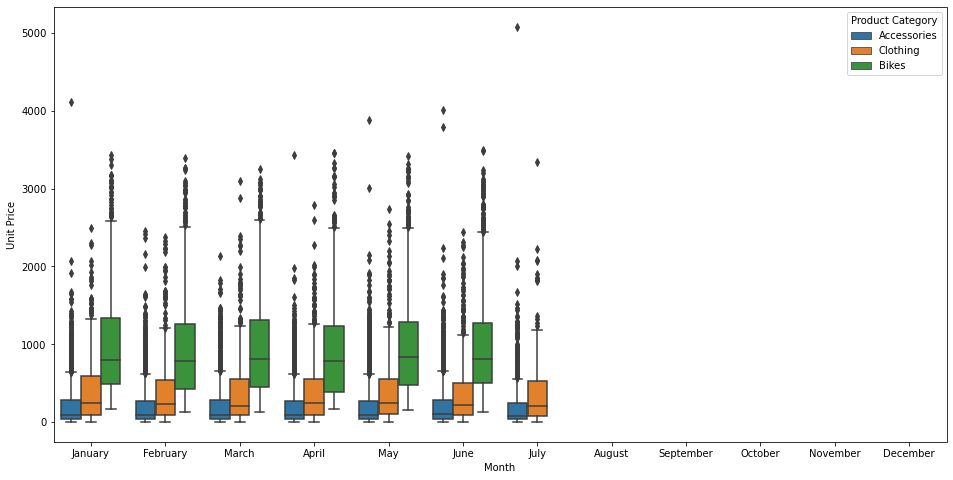

In [77]:
plt.figure(figsize=(16, 8))
sns.boxplot(x = "Month", y = "Unit Price", hue="Product Category", 
            data=df[df.Year==2016] );

There does not appear to be anything remarkable in unit prices.

### 2016 Profits

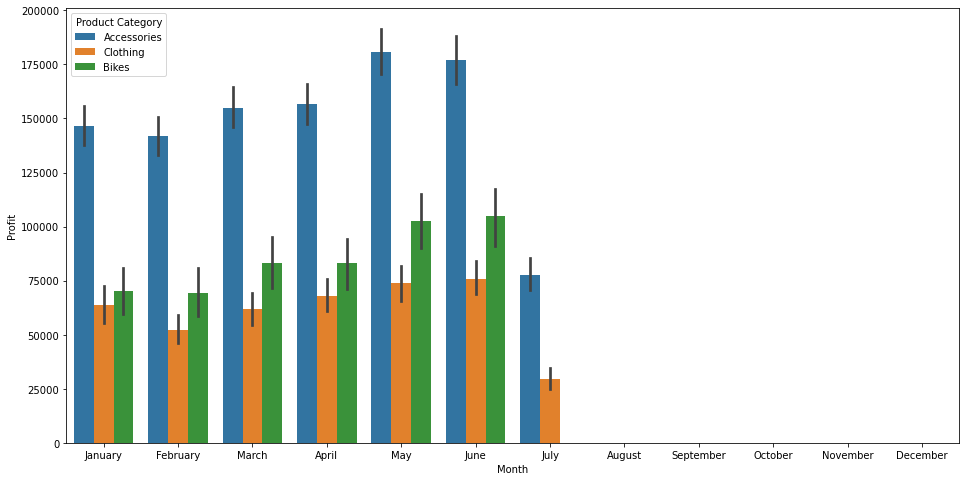

In [78]:
plt.figure(figsize=(16, 8))
sns.barplot(x = "Month", y = "Profit", hue="Product Category", estimator = sum,
            data=df[df.Year==2016] );

Bicycles, which showed constant losses in 2015, show continuous profits throughout 2016 and starting from January, and profits are constantly increasing. Accessory and clothing profits are also almost constantly on the rise. Since we cannot see the product stock quantities or prices, it does not seem possible to interpret it. The data seems to have ended in July 2016.

In [108]:
# Let's Add DAY and WEEKDAY Columns to our Table

df.rename(columns={'Date old': 'Date'}, inplace=True)
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()
df.sample(5)

,Index,Date,Year,Month,Age,Gender,Country,Region,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,Age segment,Day,Weekday
1918,1919,2015-12-29,2015.0,December,32.0,M,USA,Oregon,Accessories,Tires and Tubes,1.0,848.0,1014.000000,848.0,1014,166.0,"(25, 32]",29.0,Tuesday
25871,25872,2016-03-04,2016.0,March,27.0,M,USA,Oregon,Clothing,Gloves,3.0,204.0,232.333333,612.0,697,85.0,"(25, 32]",4.0,Friday
9715,9716,2015-10-16,2015.0,October,36.0,F,USA,California,Bikes,Road Bikes,2.0,270.0,280.000000,540.0,560,20.0,"(32, 40]",16.0,Friday
221,222,2015-08-09,2015.0,August,47.0,F,USA,Oregon,Accessories,Tires and Tubes,2.0,385.0,393.500000,770.0,787,17.0,"(40, 50]",9.0,Sunday
5541,5542,2015-08-03,2015.0,August,43.0,M,USA,California,Clothing,Jerseys,1.0,700.0,743.000000,700.0,743,43.0,"(40, 50]",3.0,Monday


In [80]:
# Number, Turnover and Profit Distribution by Years
df.groupby(["Year"])[["Quantity", "Revenue", "Profit"]].sum().sort_values(by="Year")

,Quantity,Revenue,Profit
Year,,,
2015.0,30063.0,9947771,288620.0
2016.0,39757.0,12396805,1972982.0


This result gives a summary of the situation we have encountered many times in the queries so far. Moreover, the query below shows that it contains sales information for only the first 7 months of 2016.

In [81]:
df.Date.max()

Timestamp('2016-07-31 00:00:00')

## SALES BASED ON DAYS OF THE MONTH

In [82]:
df.groupby(["Day"])[["Quantity", "Revenue", "Profit"]].sum().sort_values(by="Revenue")

,Quantity,Revenue,Profit
Day,,,
31.0,1284.0,419293,35826.0
30.0,2053.0,627707,60484.0
29.0,2119.0,629753,58415.0
16.0,2030.0,635457,61110.0
25.0,2064.0,663502,62701.0
13.0,2163.0,667988,55507.0
2.0,2144.0,677519,67807.0
27.0,2165.0,685095,80297.0
10.0,2194.0,688639,71187.0


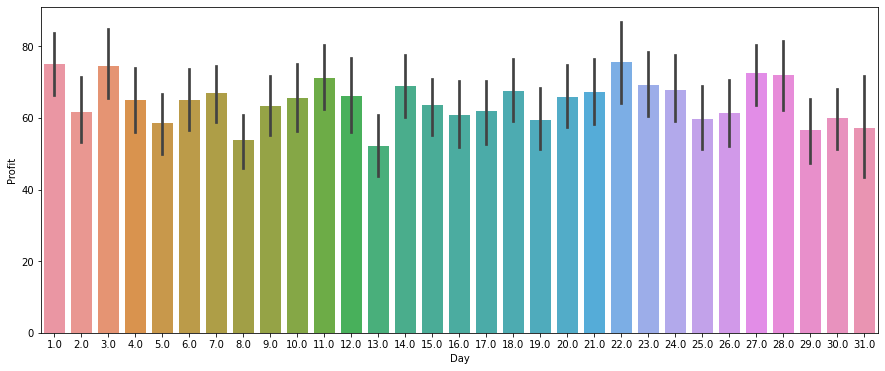

In [109]:
# PROFIT BASED ON DAYS OF THE MONTH

plt.figure(figsize=(15, 6))
sns.barplot(x="Day", y="Profit", data= df)
plt.show()

As can be seen from both the table and the graph, a constantly fluctuating sales is observed during the month. It does not seem possible to make an inference from here. Let's break it down by year here and see if anything has changed.

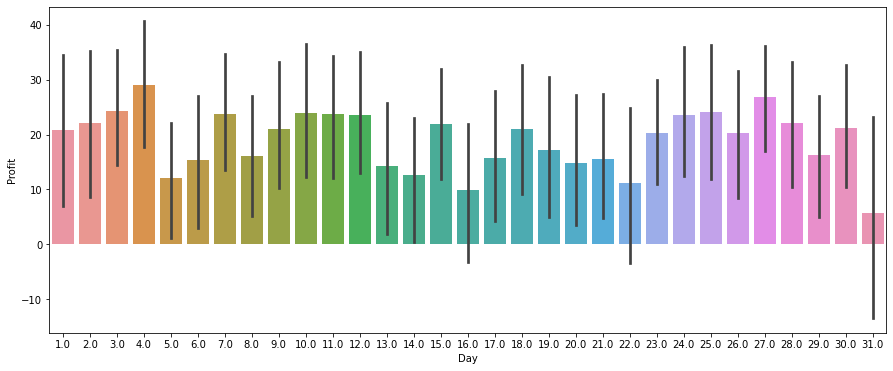

In [110]:
# 2015
plt.figure(figsize=(15, 6))
sns.barplot(x="Day", y="Profit", data= df[df.Year==2015])
plt.show()

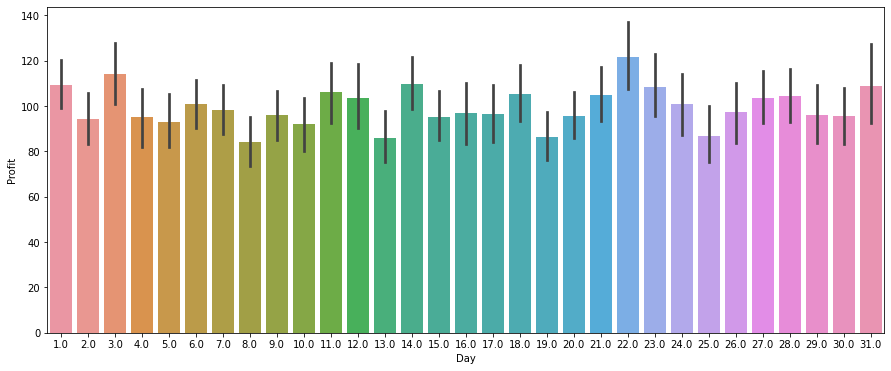

In [111]:
#2016 

plt.figure(figsize=(15, 6))
sns.barplot(x="Day", y="Profit", data= df[df.Year==2016])
plt.show()

The only notable difference in the graphs is that the average values of profits increased significantly in 2016. Apart from this, it does not seem possible to achieve meaningful results on a daily basis.

## SALES BY DAYS OF THE WEEK

In [86]:
df[df.Year==2015].groupby(["Weekday", "Gender"])[["Quantity", "Revenue", "Profit"]].sum().sort_values(by="Weekday")

Quantity  Revenue   Profit
Weekday   Gender                            
Friday    F         2261.0   735563  31415.0
          M         2159.0   700884   9983.0
Monday    F         2166.0   704388  24107.0
          M         2082.0   683200  21651.0
Saturday  F         2185.0   734052  20236.0
          M         2103.0   681661  18148.0
Sunday    F         2065.0   671840  22005.0
          M         2143.0   723154  17286.0
Thursday  F         2248.0   733023  21119.0
          M         2166.0   690097  18408.0
Tuesday   F         2188.0   739495  19669.0
          M         2081.0   714950  16124.0
Wednesday F         2172.0   733175  18331.0
          M         2044.0   702289  30138.0

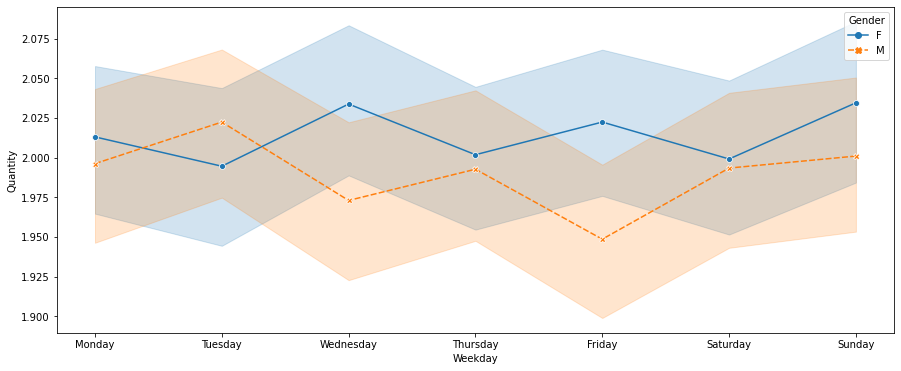

In [112]:
# NUMBER DISTRIBUTIONS BY DAYS OF THE WEEK AND GENDER IN 2015

plt.figure(figsize=(15, 6))

df['Weekday'] = pd.Categorical(df['Weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

sns.lineplot(data=df[df.Year==2015], x='Weekday', y='Quantity', hue='Gender', style='Gender', markers=True)

plt.show()

In 2015, except for Sundays, while men's shopping increases, women's shopping decreases. While women's shopping increases, men's shopping decreases. In general, it is observed that women shop more.

.

In [88]:
table_11= df[df.Year==2016].groupby(["Weekday", "Gender"])[["Quantity", "Revenue", "Profit"]].sum().sort_values(by="Weekday")
table_11.reset_index(inplace=True)
table_11

,Weekday,Gender,Quantity,Revenue,Profit
0,Monday,F,2709.0,814386,135618.0
1,Monday,M,2629.0,837332,124537.0
2,Tuesday,F,2860.0,871062,139100.0
3,Tuesday,M,2935.0,961576,152335.0
4,Wednesday,F,2632.0,833595,129364.0
5,Wednesday,M,3022.0,963689,152488.0
6,Thursday,F,2408.0,732037,110584.0
7,Thursday,M,2902.0,883960,144361.0
8,Friday,F,2847.0,871000,140469.0
9,Friday,M,3016.0,897230,145272.0


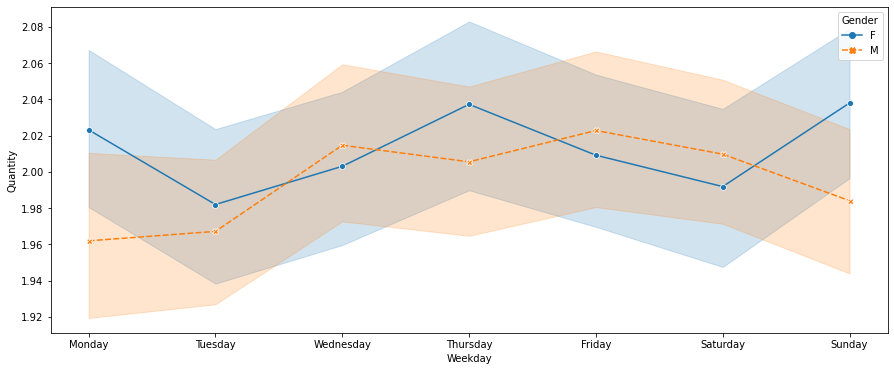

In [113]:
# NUMBER DISTRIBUTIONS BY DAYS OF THE WEEK AND GENDER IN 2016

plt.figure(figsize=(15, 6))

df['Weekday'] = pd.Categorical(df['Weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

sns.lineplot(data=df[df.Year==2016], x='Weekday', y='Quantity', hue='Gender', style='Gender', markers=True)

plt.show()


It is observed that women shop more in 2016. Women shop mostly on Sundays and men shop mostly on Fridays.

## Sales by Countries

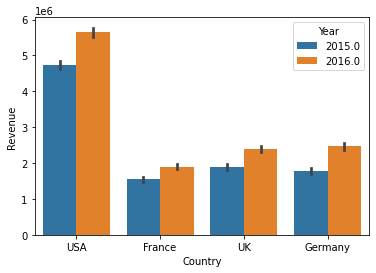

In [90]:
sns.barplot(x="Country", y= "Revenue", hue="Year", data=df, estimator=sum );

Most sales are made in the USA by far. Let's also look at the profits.

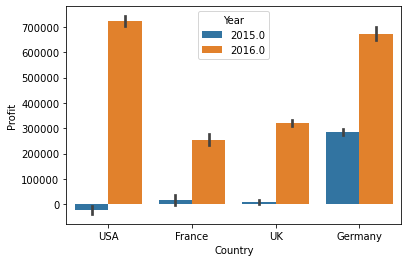

In [91]:
sns.barplot(x="Country", y= "Profit", hue="Year", data=df, estimator=sum );

A different situation is observed in the snow. While there was a loss in America in 2015, the highest profit was reached in 2016. There was no loss in the other 3 countries in 2015. In addition, while America was ahead by a wide margin in terms of turnover in both years, Germany showed a value very close to America in terms of profits. This situation gives the impression that bicycles are sold mostly in America. Especially in Germany, accessory and clothing sales must have been high in both years. Now let's check this thesis.

### BICYCLE Sales Quantities by Countries

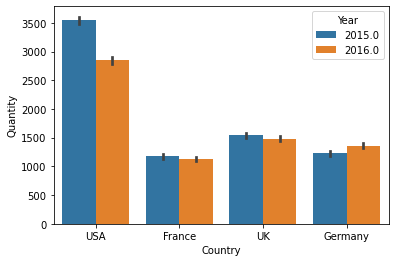

In [92]:
sns.barplot(x="Country", y= "Quantity", hue="Year", data=df[df["Product Category"]=="Bikes"], estimator=sum );

In 2016, bicycle sales increased only in Germany. Sales, which were approximately 3500-2800 in the USA, remained in the 1101-1500 range in other countries.

### ACCESSORIES and CLOTHING Sales Quantities by Countries

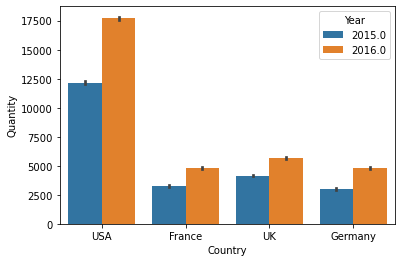

In [93]:
sns.barplot(x="Country", y= "Quantity", hue="Year", data=df[df["Product Category"]!="Bikes"], estimator=sum );

Our thesis is not fully confirmed. Clothing and accessory sales increased in all countries in 2016. In both 2015 and 2016, there were higher accessory and clothing sales in America than other countries. This situation is reflected in the 2016 profit chart. So, is America's loss in 2015 entirely due to bicycles? Is Germany's profit due to low bicycle sales?

### Profit-Loss Situation in Bicycles

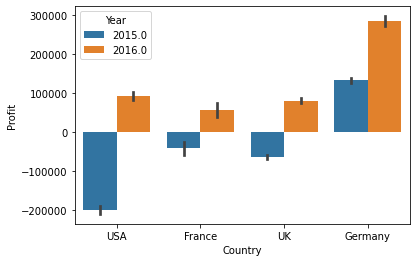

In [94]:
sns.barplot(x="Country", y= "Profit", hue="Year", data=df[df["Product Category"]=="Bikes"], estimator=sum );

There is obvious loss on bicycles in the USA in 2015. Meanwhile, it appears that the only country that suffered no loss is Germany.

### Profit-Loss Situation in Accessories and Clothing

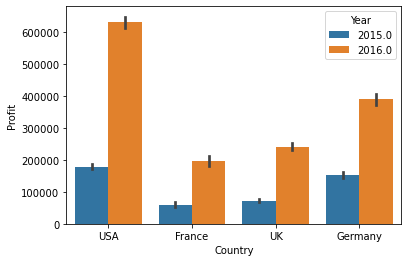

In [95]:
sns.barplot(x="Country", y= "Profit", hue="Year", data=df[df["Product Category"]!="Bikes"], estimator=sum );

The loss in America is entirely caused by bicycles. The interesting thing is that while there is a loss on bicycles and a profit on non-bicycle products in France and England, there is also a profit on bicycles in Germany. In other words, the high profit in Germany is due to the fact that profit is made not only from accessories and clothing, but also from bicycles. To analyze this better, let's compare the distribution of bicycle sales prices in Germany and the USA.

###  2015 Bicycle

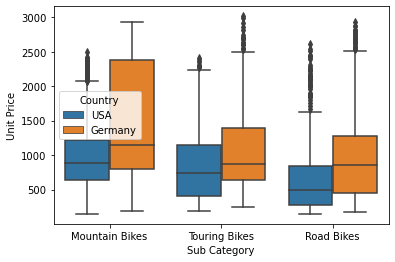

In [96]:
sns.boxplot(x = "Sub Category", y = "Unit Price", hue= "Country", 
            data=df[((df.Country=="USA") |(df.Country=="Germany") )& (df["Product Category"]=="Bikes") & (df.Year==2015)] );

###  2016 Bicycle

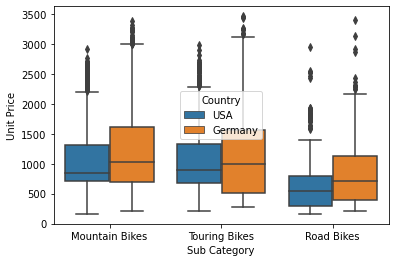

In [97]:
sns.boxplot(x = "Sub Category", y = "Unit Price", hue= "Country",
            data=df[((df.Country=="USA") |(df.Country=="Germany") )& (df["Product Category"]=="Bikes") & (df.Year==2016)] );

In 2015, prices in all bicycle categories in Germany are significantly higher than in America. Although this situation changed in 2016, prices in Germany are much higher than in America. Since the bike models are not given, we cannot say for sure, but either models with higher prices and higher profits were sold in Germany, or the prices set in Germany were higher and therefore the profits were higher.

### 2015 Accessories and Clothing

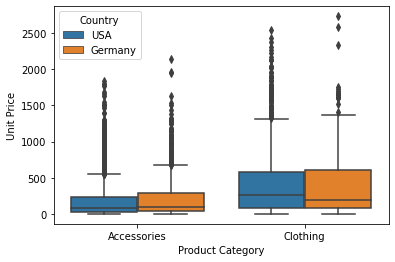

In [98]:
sns.boxplot(x = "Product Category", y = "Unit Price", hue= "Country",
            data=df[((df.Country=="USA") |(df.Country=="Germany") )& (df["Product Category"]!="Bikes") & (df.Year==2015)] );

###  2016 Accessories and Clothing

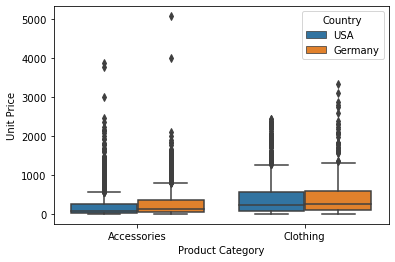

In [99]:
sns.boxplot(x = "Product Category", y = "Unit Price", hue= "Country",
            data=df[((df.Country=="USA") |(df.Country=="Germany") )& (df["Product Category"]!="Bikes") & (df.Year==2016)] );

Accessory and clothing prices are slightly higher in Germany in both years. This difference becomes more evident in accessories. Here too, we cannot be certain as in the case of bicycles, but either products with higher prices and higher profits were sold in Germany, or the prices set in Germany were higher and therefore profits were higher.